In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import json
from urllib.request import urlretrieve
from collections import defaultdict
import plotly.express as pe
fash = open('/content/drive/MyDrive/CSE 258/Project/fashion.json')
data = []
for l in fash:
    data.append(json.loads(l))


In [ ]:
len(data)

72198

In [ ]:
os.makedirs('/content/drive/MyDrive/Project/scenes_final')

In [ ]:
def convert_to_url(signature):
    prefix = 'http://i.pinimg.com/400x/%s/%s/%s/%s.jpg'
    return prefix % (signature[0:2], signature[2:4], signature[4:6], signature)
count = 0
data_count=0
for i in data:
    try:
        scene_url = convert_to_url(i["scene"])
        urlretrieve(scene_url,os.path.join('/content/drive/MyDrive/Project/scenes_final',(i['scene']+'_'+i['product']+'.jpg')))
        data_count += 1
    except:
        print("scene url", scene_url)
        print("Unsuccessful")
        count= count+1
        print("current count",count)
print(count)
print(data_count)

scene url http://i.pinimg.com/400x/cd/ab/91/cdab9160072dd1800038227960ff6467.jpg
Unsuccessful
current count 1
scene url http://i.pinimg.com/400x/14/f5/93/14f59334af4539132981b1324a731067.jpg
Unsuccessful
current count 2
scene url http://i.pinimg.com/400x/e7/d3/2d/e7d32df9f45b691afc580808750f73ca.jpg
Unsuccessful
current count 3
scene url http://i.pinimg.com/400x/09/e3/63/09e363c112056e3a6e57993063e9c5d8.jpg
Unsuccessful
current count 4
scene url http://i.pinimg.com/400x/09/e3/63/09e363c112056e3a6e57993063e9c5d8.jpg
Unsuccessful
current count 5
scene url http://i.pinimg.com/400x/ee/22/11/ee221161e2efa1424bb20f283021d6f3.jpg
Unsuccessful
current count 6
scene url http://i.pinimg.com/400x/e2/0d/85/e20d854044b7909142cd54f3da082116.jpg
Unsuccessful
current count 7
scene url http://i.pinimg.com/400x/09/e3/63/09e363c112056e3a6e57993063e9c5d8.jpg
Unsuccessful
current count 8


In [ ]:
f = open('/content/drive/MyDrive/CSE 258/Project/fashion-cat.json')
category_data = json.load(f)

In [ ]:
categories_dict = defaultdict(dict)

for productId in category_data:
    categories_dict[category_data[productId]] = {}

for productId in category_data:
    categories_dict[category_data[productId]][productId] = 0 


for scene in data:
    productId = scene['product']
    categories_dict[category_data[productId]][productId] +=1

for cat in categories_dict:
    categories_dict[cat] = sorted(categories_dict[cat].items(), key=lambda x: x[1], reverse=True)

# predicted_productIds = []
# actual_productIds = []
# for scene in data:
#     productId = scene['product']
#     actual_productIds.append(productId)
#     category = category_data[productId]
#     recommended_productIds = categories_dict[category][0:5]
# t = []
# for x,y in recommended_productIds:
#     t.append(x)
# predicted_productIds.append(t)

In [ ]:
fine_grained_categories_len_dict = {}
for k,v in categories_dict.items():
    k1 = k.split('|')
    fine_grained_categories_len_dict[k1[-1]] = len(v)

fine_grained_categories_len_dict


{'Shoes': 11780,
 'Pants': 6553,
 'Shirts & Tops': 7506,
 'Shorts': 1533,
 'Coats & Jackets': 2485,
 'Sunglasses': 1772,
 'Skirts': 1392,
 'Handbags, Wallets & Cases': 3255,
 'Earrings': 926,
 'Necklaces': 909}

In [ ]:
categories_len_dict = {}
cats = []
for k,v in categories_dict.items():
    k1 = k.split('|')
    print(k1)
    if(k1[1] not in cats):
        cats.append(k1[1])
        categories_len_dict[k1[1]] = len(v)
    else: categories_len_dict[k1[1]]+=len(v)

print(cats)
categories_len_dict


['Apparel & Accessories', 'Shoes']
['Apparel & Accessories', 'Clothing', 'Pants']
['Apparel & Accessories', 'Clothing', 'Shirts & Tops']
['Apparel & Accessories', 'Clothing', 'Shorts']
['Apparel & Accessories', 'Clothing', 'Outerwear', 'Coats & Jackets']
['Apparel & Accessories', 'Clothing Accessories', 'Sunglasses']
['Apparel & Accessories', 'Clothing', 'Skirts']
['Apparel & Accessories', 'Handbags, Wallets & Cases']
['Apparel & Accessories', 'Jewelry', 'Earrings']
['Apparel & Accessories', 'Jewelry', 'Necklaces']
['Shoes', 'Clothing', 'Clothing Accessories', 'Handbags, Wallets & Cases', 'Jewelry']


{'Shoes': 11780,
 'Clothing': 19469,
 'Clothing Accessories': 1772,
 'Handbags, Wallets & Cases': 3255,
 'Jewelry': 1835}

In [ ]:
fig = pe.bar(x=categories_len_dict.keys(),y=categories_len_dict.values(),title='Number of products belonging to each primary category')
fig.show()

In [ ]:
fig = pe.bar(x=fine_grained_categories_len_dict.keys(),y=fine_grained_categories_len_dict.values(),title='Number of products belonging to each sub category')
fig.show()

In [ ]:
import keras
import json
import sys
import tensorflow as tf
from keras.layers import Input
import numpy as np
import argparse
from keras_applications.resnext import ResNeXt50
from keras.utils.data_utils import get_file
import face_recognition

ModuleNotFoundError: ignored

In [ ]:
from zipfile import ZipFile
with ZipFile('/content/file.zip', 'r') as zip:
    zip.extractall()

In [ ]:
from tensorflow import keras
model = keras.models.load_model('/content/kaggle/working/GenderModel')


In [ ]:
from PIL import Image
def process_and_predict(file):
    im = Image.open(file)
    width, height = im.size
    if width == height:
        im = im.resize((200,200), Image.ANTIALIAS)
    else:
        if width > height:
            left = width/2 - height/2
            right = width/2 + height/2
            top = 0
            bottom = height
            im = im.crop((left,top,right,bottom))
            im = im.resize((200,200), Image.ANTIALIAS)
        else:
            left = 0
            right = width
            top = 0
            bottom = width
            im = im.crop((left,top,right,bottom))
            im = im.resize((200,200), Image.ANTIALIAS)
            
    ar = np.asarray(im)
    ar = ar.astype('float32')
    ar /= 255.0
    ar = ar.reshape(-1, 200, 200, 3)
    
    # age = agemodel.predict(ar)
    gender = np.round(model.predict(ar))
    if gender == 0:
        gender = 'male'
    elif gender == 1:
        gender = 'female'
        
    print('\n Gender:', gender)
    return im.resize((300,300), Image.ANTIALIAS)

In [ ]:
%cd /content/drive/MyDrive/Project/scenes
!ls

1/1 [==============================] - 1s 864ms/step

 Gender: male


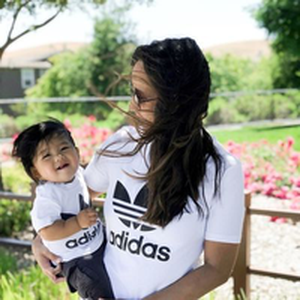

In [ ]:
process_and_predict('ff614e8ead6497090901728d81a1bddd.jpg')

1/1 [==============================] - 0s 147ms/step

 Gender: male


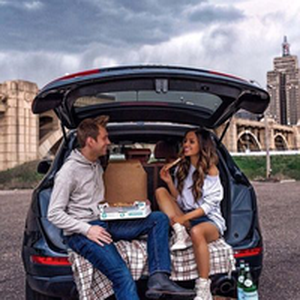

In [ ]:
process_and_predict('7fd21a587da824d04a1a229e96fac632.jpg')

1/1 [==============================] - 0s 60ms/step

 Gender: male


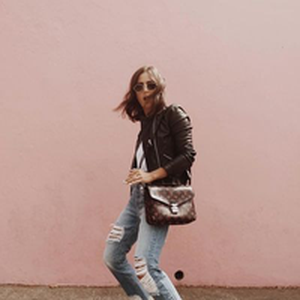

In [ ]:
process_and_predict('8063f7a83778ae1b1bf3695e08b01768.jpg')

1/1 [==============================] - 0s 77ms/step

 Gender: male


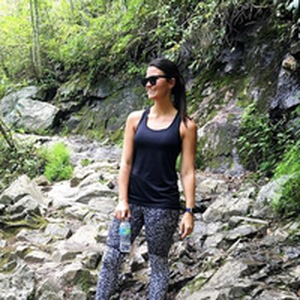

In [ ]:
process_and_predict('fffa39795f3c9e776de2b86959600dd1.jpg')

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.5 MB 4.3 MB/s 
     |████████████████████████████████| 182 kB 90.2 MB/s 
     |████████████████████████████████| 7.6 MB 82.6 MB/s 


In [ ]:
import torch

import cv2
import torchvision
import os

In [ ]:
# import random
# anchor_p_n = []
# for i in data:
#   anchor = i['scene']
#   pos_image = i['product']
#   p = "/content/drive/MyDrive/CSE 258/Project/scenes_final/" + anchor + "_" + pos_image + ".jpg"
#   if os.path.isfile(p) == True:
#     for c in categories_dict:
#       category_product_ids = set([j[0] for j in categories_dict[c]])
#       if pos_image in category_product_ids:
#         neg_image = random.choice(random.sample(category_product_ids-set(pos_image),1))
#         anchor_p_n.append([anchor,pos_image,neg_image])
#         break


In [ ]:
len(anchor_p_n)

72177

In [ ]:
# import pickle
# with open('/content/drive/MyDrive/CSE 258/Project/anchor_p_n.pkl', 'wb') as f:
#   pickle.dump(anchor_p_n, f)

In [ ]:
import pickle
with open('/content/drive/MyDrive/CSE 258/Project/anchor_p_n.pkl', 'rb') as f:
  anchor_p_n = pickle.load(f)
len(anchor_p_n)

72177

In [ ]:
!du -sh /content/drive/MyDrive/CSE\ 258/Project/scenes_final

4.0G	/content/drive/MyDrive/CSE 258/Project/scenes_final


In [ ]:
# !du -sh /content/drive/MyDrive/CSE\ 258/Project/products_final
!du -sh /content/products_final.zip
%ls

359M	/content/products_final.zip
products_final.zip  sample_data/


In [ ]:
import zipfile
from zipfile import ZipFile
with ZipFile('products_final.zip') as zf:
  zf.extractall('/content/products_final')

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
class LinearNetwork(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear1 = nn.Linear(2048,500)
    self.bn = nn.BatchNorm1d(500)
    self.linear2 = nn.Linear(500,100)

  def forward(self,x):
    x = x.reshape(-1,2048)
    x = F.relu(self.linear1(x))
    x = F.relu(self.bn(x))
    x = F.dropout(x)
    x = self.linear2(x)
    return x



In [ ]:
from torchvision.transforms import Resize

In [ ]:
class dataset(torch.utils.data.Dataset):
  def __init__(self,triplets,feature_extractor):
    self.triplets = triplets
    self.feature_extractor = feature_extractor
    self.resize = Resize((224,224))
    # self.products_dir = products_dir
    # self.scenes_dir = scenes_dir



  def __getitem__(self,idx):
    curr_triplet = self.triplets[idx]
    anchor_image = cv2.imread(os.path.join('/content/drive/MyDrive/CSE 258/Project/scenes_final',curr_triplet[0]+'.jpg'))
    # anchor_image = self.resize(torch.tensor(anchor_image).permute((2,0,1)))
    pos_image = cv2.imread(os.path.join('/content/drive/MyDrive/CSE 258/Project/products_final',curr_triplet[1]+'.jpg'))
    # pos_image = self.resize(torch.tensor(pos_image).permute((2,0,1)))
    neg_image = cv2.imread(os.path.join('/content/drive/MyDrive/CSE 258/Project/products_final',curr_triplet[2]+'.jpg'))
    # neg_image = self.resize(torch.tensor(neg_image).permute((2,0,1)))
    scene_inputs = self.feature_extractor(anchor_image,return_tensors='pt')
    # scene_inputs = scene_inputs['pixel_values'].reshape(-1,3,224,224)
    positive_product_inputs = self.feature_extractor(pos_image,return_tensors='pt')
    # positive_prodcut_inputs = scene_inputs['pixel_values'].reshape(-1,3,224,224)
    negative_product_inputs = self.feature_extractor(neg_image,return_tensors='pt')
    # negative_product_inputs = scene_inputs['pixel_values'].reshape(-1,3,224,224)

    sample = {'anchor':scene_inputs, 'pos':positive_product_inputs, 'neg':negative_product_inputs}
    return sample

  def __len__(self):
    return len(self.triplets)


In [ ]:
from transformers import AutoFeatureExtractor, ResNetModel
feature_extractor = AutoFeatureExtractor.from_pretrained("microsoft/resnet-50")


Downloading:   0%|          | 0.00/266 [00:00<?, ?B/s]

In [ ]:
import pickle
with open('/content/drive/MyDrive/CSE 258/Project/anchor_p_n.pkl', 'rb') as f:
  anchor_p_n = pickle.load(f)
len(anchor_p_n)
anchor_p_n = anchor_p_n[:25000]
n = len(anchor_p_n)
print(n)
train_anchor_triplets = anchor_p_n[:int(0.8*n)]
test_anchor_triplets = anchor_p_n[int(0.8*n):]

train_dataset = dataset(train_anchor_triplets,feature_extractor)
test_dataset = dataset(test_anchor_triplets,feature_extractor)

25000


In [ ]:
len(train_dataset)

20000

In [ ]:
from torch.utils.data import DataLoader
train_loader = DataLoader(train_dataset,batch_size=16)
test_loader = DataLoader(test_dataset,batch_size=64)


In [ ]:
train_epochs = 3
alpha=0.2



device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# device = torch.device('cpu')
model = ResNetModel.from_pretrained("microsoft/resnet-50")
linearModel = LinearNetwork()
model.to(device)
linearModel.to(device)
optimizer = torch.optim.Adam(linearModel.parameters(),lr=1e-3)
triplet_loss = nn.TripletMarginLoss(margin=0.2, p=2)
print(device)
total_step = len(train_loader)
for _ in range(train_epochs):
  for i,batch in enumerate(train_loader):
    anchor = batch['anchor']['pixel_values'].squeeze(1).to(device)
    pos = batch['pos']['pixel_values'].squeeze(1).to(device)
    neg = batch['neg']['pixel_values'].squeeze(1).to(device)

    ## forward pass
    with torch.no_grad():
      pos_outputs_pretrained = model(pos)
      neg_outputs_pretrained = model(neg)
      anchor_outputs_pretrained = model(anchor)
    
    pos_outputs = linearModel(pos_outputs_pretrained.last_hidden_state)
    neg_outputs = linearModel(neg_outputs_pretrained.last_hidden_state)
    anchor_outputs = linearModel(anchor_outputs_pretrained.last_hidden_state)

    # l2normPos = torch.linalg.norm(pos_outputs-anchor_outputs)/100
    # l2normNeg = torch.linalg.norm(neg_outputs-anchor_outputs)/100
    # print(l2normPos,l2normNeg)

    # loss = l2normPos - l2normNeg + alpha

    # loss.to(device)
    loss = triplet_loss(anchor_outputs, pos_outputs, neg_outputs)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    PATH = f'/content/drive/MyDrive/CSE 258/Project/linear_model_3{_}{i+1}.pth'
    if (i+1) % 50 == 0:
      torch.save({
            'epoch': _+1,
            'model_state_dict': linearModel.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'loss': loss,
            }, PATH)
      print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(_+1, train_epochs, i+1, total_step, loss.item()))

Some weights of the model checkpoint at microsoft/resnet-50 were not used when initializing ResNetModel: ['classifier.1.weight', 'classifier.1.bias']
- This IS expected if you are initializing ResNetModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing ResNetModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


cuda
Epoch [1/3], Step [50/1250], Loss: 0.7516
Epoch [1/3], Step [100/1250], Loss: 0.6150
Epoch [1/3], Step [150/1250], Loss: 0.4705
Epoch [1/3], Step [200/1250], Loss: 0.3905
Epoch [1/3], Step [250/1250], Loss: 0.2778
Epoch [1/3], Step [300/1250], Loss: 0.2737
Epoch [1/3], Step [350/1250], Loss: 0.2698
Epoch [1/3], Step [400/1250], Loss: 0.2548
Epoch [1/3], Step [450/1250], Loss: 0.2586
Epoch [1/3], Step [500/1250], Loss: 0.2555
Epoch [1/3], Step [550/1250], Loss: 0.2777
Epoch [1/3], Step [600/1250], Loss: 0.2877
Epoch [1/3], Step [650/1250], Loss: 0.2703
Epoch [1/3], Step [700/1250], Loss: 0.2702
Epoch [1/3], Step [750/1250], Loss: 0.2546
Epoch [1/3], Step [800/1250], Loss: 0.2132
Epoch [1/3], Step [850/1250], Loss: 0.2629
Epoch [1/3], Step [900/1250], Loss: 0.2612
Epoch [1/3], Step [950/1250], Loss: 0.2342
Epoch [1/3], Step [1000/1250], Loss: 0.2447
Epoch [1/3], Step [1050/1250], Loss: 0.2434
Epoch [1/3], Step [1100/1250], Loss: 0.2265
Epoch [1/3], Step [1150/1250], Loss: 0.2229
Epo

In [ ]:
linearModel = LinearModel()
optimizer = torch.optim.Adam(linearModel.parameters(), lr=1e-3)

checkpoint = torch.load(PATH)
model.load_state_dict(checkpoint['model_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
epoch = checkpoint['epoch']
loss = checkpoint['loss']

model.eval()
# - or -
model.train()

/content/drive/MyDrive/CSE 258/Project/scenes_final


In [ ]:
### Inference

In [ ]:

######## Calculating Binary ACC #############

from transformers import AutoFeatureExtractor, ResNetModel
feature_extractor = AutoFeatureExtractor.from_pretrained("microsoft/resnet-50")
model = ResNetModel.from_pretrained("microsoft/resnet-50")
linearModel = torch.load('path-to-model')

acc = [] 
for triplet in anchor_p_n:
  anchor = anchor_p_n[0]
  p = anchor_p_n[1]
  n = anchor_p_n[2]

  anchor_image = cv2.imread(os.path.join('/content/dir_name/',anchor+'.jpg'))
  pos_image = cv2.imread(os.path.join('/content/dir_name/',pos+'.jpg'))
  neg_image = cv2.imread(os.path.join('/content/dir_name/',neg+'.jpg'))

  scene_inputs = feature_extractor(anchor_image,return_tensors='pt')
  positive_product_inputs = feature_extractor(pos_image,return_tensors='pt')
  negative_product_inputs = feature_extractor(neg_image,return_tensors='pt')

  with torch.no_grad():
      pos_outputs_pretrained = model(pos)
      neg_outputs_pretrained = model(neg)
      anchor_outputs_pretrained = model(anchor)
    
  pos_outputs = linearModel(pos_outputs_pretrained.last_hidden_state)
  neg_outputs = linearModel(neg_outputs_pretrained.last_hidden_state)
  anchor_outputs = linearModel(anchor_outputs_pretrained.last_hidden_state)

  l2normPos = torch.linalg.norm(pos_outputs-anchor_outputs)/100
  l2normNeg = torch.linalg.norm(neg_outputs-anchor_outputs)/100

  if l2normPos<l2normNeg:
    acc.append(1)
  else:
    acc.append(0)

accuracy = sum(acc)/len(acc)




In [ ]:
####### Top-K acc Baseline ##########
import plotly.graph_objects as go
categories_dict = defaultdict(dict)

for productId in category_data:
    categories_dict[category_data[productId]] = {}
for productId in category_data:
    categories_dict[category_data[productId]][productId] = 0 

    
for scene in data:
    productId = scene['product']
    categories_dict[category_data[productId]][productId] +=1

for cat in categories_dict:
    categories_dict[cat] = sorted(categories_dict[cat].items(), key=lambda x: x[1], reverse=True)




all_accs = {}
for k in range(50):
    actual_productIds = []
    predicted_productIds = []
    for scene in data:
        productId = scene['product']
        actual_productIds.append(productId)
        category = category_data[productId]
        recommended_productIds = categories_dict[category][0:k]
        t = []
        for x,y in recommended_productIds:
            t.append(x)
        predicted_productIds.append(t)
    acc=0
    try:
        for i,j in enumerate(actual_productIds):
            n = predicted_productIds[i]
            if j in n:
                acc+=1
        all_accs[k] = acc/len(actual_productIds)
    except:
        print("byee")

# fig2 = pe.line(x=list(all_accs.keys()), y=list(all_accs.values()), title='TopK acc')
# fig2.show()

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=list(all_accs.keys()),
    y=list(all_accs.values()),
    name="Baseline - Most popular"
))

fig.add_trace(go.Scatter(
    x=list(all_accs.keys()),
    y=list(all_accs.values()),
    name="Baseline - Most popular"
))
import copy
all_accs2 = copy.deepcopy(all_accs)



In [ ]:
fig.show()

In [ ]:
fig2 = pe.line(x=list(all_accs.keys()), y=list(all_accs.values()), title='TopK acc')
# fig2.update_layout(legend_title_text = "Lmao")
fig2.show()

In [ ]:
import zipfile
from zipfile import ZipFile
with ZipFile('products_final.zip') as zf:
  zf.extractall('/content/products_final')

In [ ]:
##### Top K using Deep Learning Model based on Similarities for 100 most popular products
import cv2
import torch
import scipy
import pickle

from transformers import AutoFeatureExtractor, ResNetModel
feature_extractor = AutoFeatureExtractor.from_pretrained("microsoft/resnet-50")
model = ResNetModel.from_pretrained("microsoft/resnet-50")
linearModel = LinearNetwork()
checkpoint = torch.load('/content/drive/MyDrive/CSE 258/Project/linear_model_321250.pth',map_location=torch.device('cpu'))
linearModel.load_state_dict(checkpoint['model_state_dict'])

actual_productIds = []
predicted_productIds = []
# if os.path.exists('/content/drive/MyDrive/CSE 258/Project/recommended_productId_Final.pkl'):
#   with open('/content/drive/MyDrive/CSE 258/Project/recommended_productId_Final.pkl', 'rb') as f:
#     recommended_productId_Final = pickle.load(f)
# else:
recommended_productId_Final = {}

for s in data[0:500]:
  x = s['scene'] + '_' + s['product']
  recommended_productId_Final[x] = []

print("Hellooooo")
  # ['123-3456': ('Nike Shoes(product id)',0.8),.....()]
# count =0
for idx,scene in enumerate(data[0:500]):
    # if count>15:
    #   break
    sceneId = scene['scene']
    productId = scene['product']
    x =  scene['scene'] + '_' + scene['product']
    if x in recommended_productId_Final:
      if len(recommended_productId_Final[x]) != 0:
        continue

    anchor_image = cv2.imread(os.path.join('/content/drive/MyDrive/CSE 258/Project/scenes_final',sceneId+'.jpg'))
    anchor_inputs = feature_extractor(anchor_image,return_tensors='pt')['pixel_values']
    with torch.no_grad():
        anchor_outputs_pretrained = model(anchor_inputs)
    anchor_outputs = linearModel(anchor_outputs_pretrained.last_hidden_state)
    actual_productIds.append(productId)
    category = category_data[productId]
    count=0
    for product in categories_dict[category][0:100]:
      productId_cat = product[0]

      image = cv2.imread(os.path.join('/content/drive/MyDrive/CSE 258/Project/products_final',productId_cat+'.jpg'))
      product_inputs = feature_extractor(image,return_tensors='pt')['pixel_values']
      with torch.no_grad():
        outputs_pretrained = model(product_inputs)
      outputs = linearModel(outputs_pretrained.last_hidden_state)
      l2normPos = torch.linalg.norm(outputs-anchor_outputs)/100
      recommended_productId_Final[x].append((productId_cat,l2normPos.item()))
      print(f'{x},{idx} done.')
      with open('/content/drive/MyDrive/CSE 258/Project/recommended_productId_Final.pkl', 'wb') as f:
        pickle.dump(recommended_productId_Final, f)
      # count = count+1
      # if count>15:
      #   break

# for y in recommended_productId_Final:
#   recommended_productId_Final[y]= sorted(recommended_productId_Final[y], key=lambda x: x[1])    
    
# all_accs = {}
# for k in range(1,50):
#   predicted = []
#   for y in recommended_productId_Final:
#     t1 = recommended_productId_Final[y][0:k]
#     t = []
#     for x,y in t1:
#       t.append(x)
#     predicted.append(t)
#     acc=0
#     try:
#         for i,j in enumerate(actual_productIds):
#             n = predicted[i]
#             if j in n:
#                 acc+=1
#         all_accs[k] = acc/len(actual_productIds)
#         print(f'K is {k} and acc is {all_accs[k]}')

#     except:
#         print("byee")
# fig = pe.line(x=list(all_accs.keys()), y=list(all_accs.values()), title='TopK acc')
# fig.show()

Some weights of the model checkpoint at microsoft/resnet-50 were not used when initializing ResNetModel: ['classifier.1.weight', 'classifier.1.bias']
- This IS expected if you are initializing ResNetModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing ResNetModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Streaming output truncated to the last 5000 lines.
b275b6e38d30a5076e1de3346b8e67b1_a9545e68afa4270eaab3108d8301e0f4,450 done.
b275b6e38d30a5076e1de3346b8e67b1_a9545e68afa4270eaab3108d8301e0f4,450 done.
b275b6e38d30a5076e1de3346b8e67b1_a9545e68afa4270eaab3108d8301e0f4,450 done.
b275b6e38d30a5076e1de3346b8e67b1_a9545e68afa4270eaab3108d8301e0f4,450 done.
b275b6e38d30a5076e1de3346b8e67b1_a9545e68afa4270eaab3108d8301e0f4,450 done.
b275b6e38d30a5076e1de3346b8e67b1_a9545e68afa4270eaab3108d8301e0f4,450 done.
b275b6e38d30a5076e1de3346b8e67b1_a9545e68afa4270eaab3108d8301e0f4,450 done.
b275b6e38d30a5076e1de3346b8e67b1_a9545e68afa4270eaab3108d8301e0f4,450 done.
b275b6e38d30a5076e1de3346b8e67b1_a9545e68afa4270eaab3108d8301e0f4,450 done.
b275b6e38d30a5076e1de3346b8e67b1_a9545e68afa4270eaab3108d8301e0f4,450 done.
b275b6e38d30a5076e1de3346b8e67b1_a9545e68afa4270eaab3108d8301e0f4,450 done.
b275b6e38d30a5076e1de3346b8e67b1_a9545e68afa4270eaab3108d8301e0f4,450 done.
b275b6e38d30a5076e1de3346b8e67b1_a954

In [ ]:

# /content/drive/MyDrive/CSE 258/Project/recommended_productId_Final.pkl
import pickle
from pprint import pprint
with open('/content/drive/MyDrive/CSE 258/Project/recommended_productId_Final.pkl','rb') as f:
  p = pickle.load(f)
pprint(p)
recommended_productId_Final = p

Streaming output truncated to the last 5000 lines.
 'f25b9b013f19d83b0357cf06a94357d0_697b08e16420a1b4a700f30d779b0e94': [('42ded1188980f834f969c16f166ae561',
                                                                        0.03206043690443039),
                                                                       ('e251be60024247981999ba5a38b53894',
                                                                        0.029534848406910896),
                                                                       ('8c9342e5ccd72353dd607d80cb78e63f',
                                                                        0.031160924583673477),
                                                                       ('cdff384f701a023e3d8824d1d7c44e5f',
                                                                        0.03287201374769211),
                                                                       ('46fa702cf371129db47383bd26467d26',
                               

In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=list(all_accs2.keys()),
    y=list(all_accs2.values()),
    name="Baseline - Most popular"
))
fig.show()

for y in recommended_productId_Final:
  recommended_productId_Final[y]= sorted(recommended_productId_Final[y], key=lambda x: x[1])    

all_accs = {}
for k in range(1,50):
  predicted = []
  for y in recommended_productId_Final:
    t1 = recommended_productId_Final[y][0:k]
    t = []
    for x,y in t1:
      t.append(x)
    predicted.append(t)
  acc=0
  # try: 
  for i,j in enumerate(actual_productIds[0:500]):
      print(i)
      n = predicted[i]
      
      if j in n:
          acc+=1
  
  all_accs[k] = acc/500
  print(f'K is {k} and acc is {all_accs[k]}')

  # except:
  # print(k)
  # print(y)
  print("byee")

# from pprint import pprint
# pprint(all_accs)
fig.add_trace(go.Scatter(
    x=list(all_accs.keys()),
    y=list(all_accs.values()),
    name="Global Compatibility"
))

# fig = pe.line(x=list(all_accs.keys()), y=list(all_accs.values()), title='TopK acc')
fig.show()

Streaming output truncated to the last 5000 lines.
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
2

In [ ]:
print(all_accs2 == all_accs)

False


In [ ]:
print(len(actual_productIds))

72198


In [ ]:
fig.update_traces(line_color = "#FF0000")
fig.add_trace(fig2.data[0])
# fig.update_layout(legend_traceorder = "reversed")
fig['data'][0]['showlegend']=True
fig['data'][0]['name'] = 'Global Compatibility Triplet Loss'
fig2.update_traces(line_color = "#0000FF")
fig2['data'][0]['showlegend']=True
fig2['data'][0]['name'] = 'Lmaoooo'
fig.show()

In [ ]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=[1, 2, 3, 4, 5],
    y=[1, 2, 3, 4, 5],
    name="Positive"
))

fig.add_trace(go.Scatter(
    x=[1, 2, 3, 4, 5],
    y=[5, 4, 3, 2, 1],
    name="Negative"
))

fig.show()